<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson14/%D0%94%D0%97_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 70 баллов
* Задача 2 &mdash; 30 баллов






-----

In [ ]:
# Bot check

# HW_ID: phds_hw13
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

# Causal Inference + DoWhy



In [2]:
!pip install dowhy -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import networkx as nx
from dowhy import gcm

from dowhy import CausalModel
import networkx as nx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 12.9 MB/s eta 0:00:00




### Задача 1.

In [1]:
!wget https://github.com/NMashalov/2023_OpenMipt_course/raw/main/lesson14/covid_data.xlsx

--2024-01-13 12:02:18--  https://github.com/NMashalov/2023_OpenMipt_course/raw/main/lesson14/covid_data.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NMashalov/2023_OpenMipt_course/main/lesson14/covid_data.xlsx [following]
--2024-01-13 12:02:18--  https://raw.githubusercontent.com/NMashalov/2023_OpenMipt_course/main/lesson14/covid_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8139 (7.9K) [application/octet-stream]
Saving to: ‘covid_data.xlsx’

covid_data.xlsx     100%[===================>]   7.95K  --.-KB/s    in 0s      

2024-01-13 12:02:19 (42.5 MB/s) - ‘covid_data.xlsx’ sa

In [6]:
data = pd.read_excel('/content/covid_data.xlsx',index_col=[0])

In [7]:
data.head(5)

,Country,Age group,Confirmed cases,Confirmed fatalities
0,Italy,0-9,43,0
1,Italy,10-19,85,0
2,Italy,20-29,296,0
3,Italy,30-39,470,0
4,Italy,40-49,891,1


**1.** Рассмотрим данные по заболеваемости и смертности от COVID-19 в марте 2020 года когда пандемия только начиналась. В данных представлена информация по нескольким странам по разным возрастным категориям.

Считайте данные и посчитайте Case Fatality Rate (CFR) &mdash; процент смертности при условии подтвержденного коронавируса

In [8]:
data['CFR'] = data['Confirmed fatalities'] / data['Confirmed cases']

Будем рассматривать Китай и Италию как довольно разные страны, в которых коронавирус в начале 2020 развивался наиболее стремительно.

Постройте гистограмму для сравнения CFR двух стран по возрастным категориям. Используйте для этого один вызов `seaborn.barplot` с некоторыми параметрами.

<Axes: xlabel='CFR', ylabel='Country'>

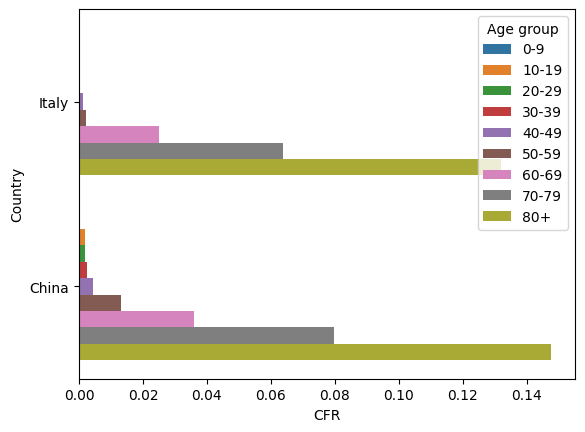

In [13]:
sns.barplot(data=data[data.Country.isin(['Italy','China'])],x='CFR',y='Country',hue='Age group')

Теперь посчитайте общую CFR на основе суммарного количества случаев по всем категориями и сравните их для этих двух стран.

<Axes: xlabel='CFR', ylabel='Country'>

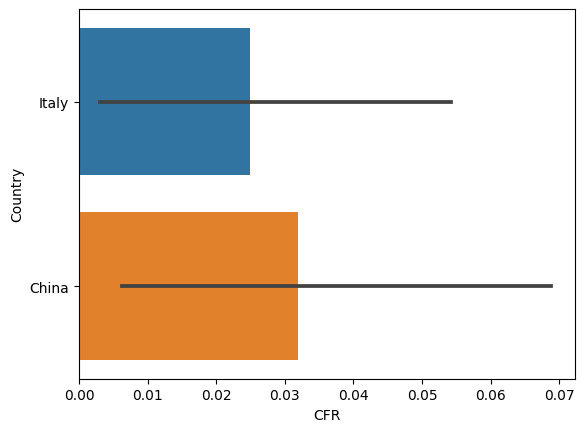

In [14]:
sns.barplot(data=data[data.Country.isin(['Italy','China'])],x='CFR',y='Country')

Что можно наблюдать?

Смертность среди пожилого населения значительно выше.
Статзначимого различия в смертности между странами нет.

**2.** Итак, мы исследуем три признака: страна, возрастная категория, CFR. Определите на них граф причинно-следственных связей на основе логических соображений и визуализируйте его.

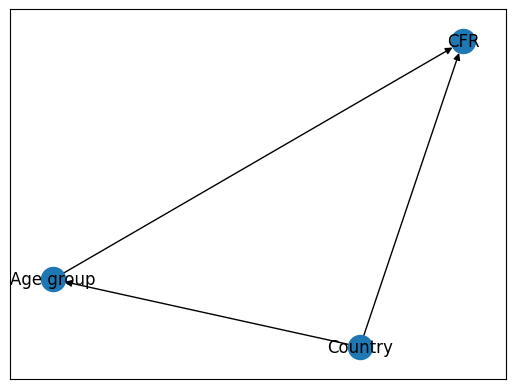

In [25]:
causal_graph = nx.DiGraph([
    ('Country','Age group'), # страна определяет политику по поддержке пожилого населения
    ('Country','CFR'), # cтрана определяет политику изоляции во время пандемии
    ('Age group','CFR'), # пожилые люди чаще погибают при заболевании
])
nx.draw_networkx(causal_graph)

Для каждой вершины опишите характер причинно-следственной связи. Например, если это линейная регрессия, то надо выписать ее формулу.

In [24]:
data

,Country,Age group,Confirmed cases,Confirmed fatalities,CFR
0,Italy,0-9,43,0,0.000000
1,Italy,10-19,85,0,0.000000
2,Italy,20-29,296,0,0.000000
3,Italy,30-39,470,0,0.000000
4,Italy,40-49,891,1,0.001122
...,...,...,...,...,...
103,South Korea,40-49,1481,3,0.002026
104,South Korea,50-59,1987,15,0.007549
105,South Korea,60-69,1375,39,0.028364
106,South Korea,70-79,719,78,0.108484


In [26]:
from dowhy import gcm
causal_model = gcm.StructuralCausalModel(causal_graph)

causal_model.set_causal_mechanism('Country', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('Age group', gcm.ClassifierFCM())
causal_model.set_causal_mechanism('CFR', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))

gcm.fit(causal_model,data)

Fitting causal mechanism of node CFR: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]


**3.** Сделаем две копии признака "страна":
* `demography` ($D$) &mdash; демографическая ситуация, определяемая страной;
* `treatment methods` ($T$) &mdash; методы лечения, свойственные стране.

Мы делаем такое разделение потому как, например, одна страна может взять методы лечения другой страны, но демографическую ситуацию поменять при этом не получится.

Получается следующий причинно-следственный граф. Визуализируйте его

In [27]:
data['demography'] = data['Country']
data['treatment methods'] = data['Country']

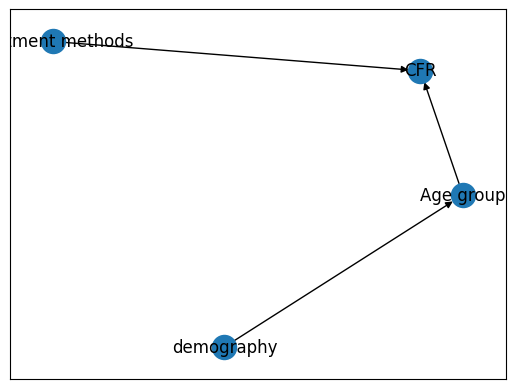

In [28]:
causal_graph = nx.DiGraph([
    ('demography', 'Age group'),
    ('treatment methods', 'CFR'),
    ('Age group', 'CFR')
])
nx.draw_networkx(causal_graph )

Определите по графу causal модель и обучите ее

In [29]:
from dowhy import gcm
causal_model = gcm.StructuralCausalModel(causal_graph)
causal_model.set_causal_mechanism('demography', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('treatment methods', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('Age group', gcm.ClassifierFCM())
causal_model.set_causal_mechanism('CFR', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))

gcm.fit(causal_model,data)

Fitting causal mechanism of node CFR: 100%|██████████| 4/4 [00:00<00:00, 12.83it/s]


С помощью интервенции оцените, было бы эффективнее применять в Китае с его демографической ситуацией итальянские методы лечения. Для этого нужно оценить величину
$$NDE = \mathsf{E}(CFR\ |\ D:=China, T:=Italy) - \mathsf{E}(CFR\ |\ D:=China, T:=China),$$
где NDE &mdash; Natural Direct Effect. Используйте достаточно большое количество семплирований.

In [33]:
num_samples_to_draw = 100_000
interventional_mean = []

for i in ['China','Italy']:
    samples = gcm.interventional_samples(
        causal_model,
        {'treatment methods': lambda y: i,
         'demography': lambda y: 'China',
         },  # условие интервенции
        num_samples_to_draw=num_samples_to_draw  # количество семплирований
    )
    interventional_mean.append(samples)

ATE = interventional_mean[1]['CFR'].mean() - interventional_mean[0]['CFR'].mean()
ATE

-0.007373883898152377

Итальянские методы лечения бы снизили CFR в Китае



Теперь, наоборот, оцените, было бы эффективнее применять в Италии с его демографической ситуацией китайские методы лечения.

In [36]:
num_samples_to_draw = 100_000
interventional_mean = []

for i in ['Italy','China']:
    samples = gcm.interventional_samples(
        causal_model,
        {'treatment methods': lambda y: i,
         'demography': lambda y: 'Italy',
         },  # условие интервенции
        num_samples_to_draw=num_samples_to_draw  # количество семплирований
    )
    interventional_mean.append(samples)

ATE = interventional_mean[1]['CFR'].mean() - interventional_mean[0]['CFR'].mean()
ATE

0.006801747586418917

Китайские методы бы увеличили CFR в Италии

Наконец, оценим, что было бы если в Китае с его методами лечения демографическая ситуация была бы такой же, как в Италии (Natural Indirect Effect). Какую величину при этом надо посчитать? Посчитайте ее.

$$NIE = \mathsf{E}(CFR\ |\ D:=Italy, T:=China) - \mathsf{E}(CFR\ |\ D:=China, T:=China),$$

In [35]:
for i in ['China','Italy']:
    samples = gcm.interventional_samples(
        causal_model,
        {'treatment methods': lambda y: 'China',
         'demography': lambda y: i,
         },  # условие интервенции
        num_samples_to_draw=num_samples_to_draw  # количество семплирований
    )
    interventional_mean.append(samples)

ATE = interventional_mean[1]['CFR'].mean() - interventional_mean[0]['CFR'].mean()
ATE

-0.006685295430442235

Итальянская демография бы снизила CFR в Китае

---
### Задача 2.

Загрузите <a href="https://github.com/robjellis/lalonde">данные</a> об исследовании влияния эффективности программы профессиональной переподготовки по отношению к реальному заработку человека через пару лет после завершения программы (в 1978). Данные также содержат несколько демографических показателей &mdash; возраст, раса, академическое образование и предыдущий заработок.


- `treat` были ли пройдена программа (1 = тестовая группа, 0 = контроль).
- `age` возраст.
- `educ` количество лет обучения.
- `black` обозначение расы (1 = афроамериканец, 0 = нет).
- `hispan` латиноамериканского происхождения (1 = да, 0 = нет).
- `married` семейное положение (1 = женат/замужем, 0 = неженат/незамужем).
- `nodegree` есть ли высшее образование (1 = да, 0 = нет).
- `re74` доход в 1974 году в долларах США.
- `re75` доход в 1975 году в долларах США.
- `re78` доход в 1978 году в долларах США.

In [ ]:
!wget https://raw.githubusercontent.com/robjellis/lalonde/master/lalonde_data.csv

--2024-01-12 07:04:36--  https://raw.githubusercontent.com/robjellis/lalonde/master/lalonde_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26824 (26K) [text/plain]
Saving to: ‘lalonde_data.csv’

lalonde_data.csv    100%[===================>]  26.20K  --.-KB/s    in 0s      

2024-01-12 07:04:36 (68.6 MB/s) - ‘lalonde_data.csv’ saved [26824/26824]



In [ ]:
data = pd.read_csv('lalonde_data.csv', index_col=0)
data.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
ID,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [ ]:
data.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


Постройте оценки propensity score с помощью библиотеки DoWhy.

In [ ]:
T = 'treat'  # переменная treatment
Y = 're78'  # целевая переменная
X = ['educ','age','black','hispan','married','nodegree']  # список кофаундереов

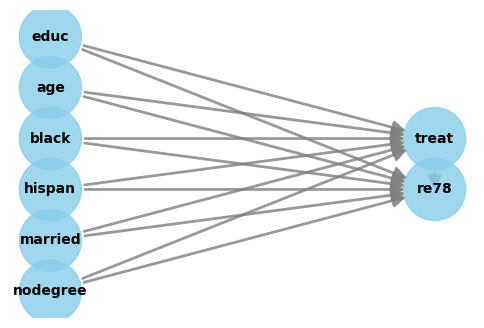

In [ ]:
model = CausalModel(
    data=data,
    treatment=T,
    outcome=Y,
    common_causes=X
)

model.view_model(file_name="causal_model", size=(6, 4))
#display(Image(filename="causal_model.png"))

In [ ]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                    
────────(E[re78|nodegree,married,black,age,educ,hispan])
d[treat]                                                
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,nodegree,married,black,age,educ,hispan,U) = P(re78|treat,nodegree,married,black,age,educ,hispan)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_weighting",
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                    
────────(E[re78|nodegree,married,black,age,educ,hispan])
d[treat]                                                
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,nodegree,married,black,age,educ,hispan,U) = P(re78|treat,nodegree,married,black,age,educ,hispan)

## Realized estimand
b: re78~treat+nodegree+married+black+age+educ+hispan
Target units: ate

## Estimate
Mean value: 201.59485374546512



Выводы: Dowhy удобный интструмент для проведения Causal Analysis. Обучение согласно оценке эффективно